## О Jupyter notebook

Jupyter Notebook — это среда разработки, где сразу можно видеть результат выполнения кода и его отдельных фрагментов. Отличие от традиционной среды разработки в том, что код можно разбить на куски и выполнять их в произвольном порядке.
Для запуска кода в ячейке можно воспользоваться меню сверху или нажать клавиши "Enter+Shift".

Основная область применения ноутбуков — машинное обучение, нейросети, визуализация данных и статистика.

Ещё такую среду часто используют для поэтапной разработки, когда нужно по шагам проверять работу разных фрагментов кода. Дело в том, что код в ноутбуках хранится в независимых ячейках и его можно запускать в любом порядке или поодиночке. Это позволяет быстро экспериментировать с алгоритмами и находить оптимальное решение.

Также jupyter-ноутбуки используются при обучении программированию на Python, чтобы писать код и сразу видеть результат его работы.

Есть два основных типа ячеек, которые мы рассмотрим:

- Ячейка кода содержит код, который должен быть выполнен в ядре, и отображает его вывод ниже.
- Ячейка Markdown содержит текст, отформатированный с использованием Markdown, и отображает его вывод на месте при запуске.

In [253]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

А это ___ячейка с текстом___.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [254]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

## 1. Табличные данные и Pandas

Pandas — это библиотека для работы с данными на Python. Она упрощает жизнь аналитикам: где раньше использовалось 10 строк кода теперь хватит одной.

Например, чтобы прочитать данные из csv, в стандартном Python надо сначала решить, как хранить данные, затем открыть файл, прочитать его построчно, отделить значения друг от друга и очистить данные от специальных символов.

В Pandas всё проще. Во-первых, не нужно думать, как будут храниться данные — они лежат в датафрейме. Во-вторых, достаточно написать одну команду:

 data = pd.read_csv('file.csv')

Pandas добавляет в Python новые структуры данных — серии и датафреймы. 

Серии — одномерные массивы данных. Они очень похожи на списки, но отличаются по поведению — например, операции применяются к списку целиком, а в сериях — поэлементно.
Еще одно отличие серий от списков — в качестве индексов можно использовать произвольные значения, это делает данные нагляднее.
Датафрейм — это проиндексированный многомерный массив значений, соответственно каждый столбец датафрейма, является серией.

In [255]:
import pandas as pd

#### 1. Прочитайте файл с таблицей, выведите последние 10 строк.



In [256]:
df = pd.read_csv("data.csv")
print(df[-10:])

                      event_time             order_id           product_id  \
2633511  2020-11-21 10:05:04 UTC  2388440981134693938  1515966223509088509   
2633512  2020-11-21 10:06:01 UTC  2388440981134693939  1515966223509090132   
2633513  2020-11-21 10:08:14 UTC  2388440981134693940  2273948246856434093   
2633514  2020-11-21 10:08:54 UTC  2388440981134693941  1515966223519279912   
2633515  2020-11-21 10:08:54 UTC  2388440981134693941  1515966223509088622   
2633516  2020-11-21 10:10:01 UTC  2388440981134693942  1515966223526602848   
2633517  2020-11-21 10:10:13 UTC  2388440981134693943  1515966223509089282   
2633518  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509089917   
2633519  2020-11-21 10:10:30 UTC  2388440981134693944  2273948184839454837   
2633520  2020-11-21 10:10:30 UTC  2388440981134693944  1515966223509127566   

          category_id                  category_code     brand    price  \
2633511  2.268105e+18         electronics.smartphone     apple   9

#### 2.  Выведите следующую информацию:
1. Сколько всего заказов в исходной выборке данных?
2. Количество уникальных категорий товара (category_code)

In [257]:
print(len(df['order_id'].unique()))
print(len(df['category_code'].unique()))

1435266
511


#### 3. Найдите столбцы с пустыми значениями, заполните строковые значения пустой строкой, числовые - 0.

In [258]:
df.price = df.price.fillna(0) 
df = df.fillna('') 
print(df[df.isna().any(axis=1)])
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [event_time, order_id, product_id, category_id, category_code, brand, price, user_id]
Index: []
Empty DataFrame
Columns: [event_time, order_id, product_id, category_id, category_code, brand, price, user_id]
Index: []


#### 4.  Обратите внимание на колонку, содержащую цену товара. Создайте новую колонку, таким образом, чтобы цена стала числом.

Для этого необходимо применить функцию-преобразование к каждой строке таблицы (для этого есть соответствующая функция).

In [259]:
df['new_price'] = df['price'].copy() 
df['new_price'] = df['new_price'].astype('float')
print(df.dtypes)

event_time        object
order_id           int64
product_id         int64
category_id       object
category_code     object
brand             object
price            float64
user_id           object
new_price        float64
dtype: object

Выведите среднюю/минимальную/максимальную цену у товара.

In [260]:
print(df["new_price"].agg(["mean", "min", "max"]))

mean      128.818577
min         0.000000
max     50925.900000
Name: new_price, dtype: float64

Удалите старую колонку с ценой.

In [261]:
df = df.drop(columns=['price'], axis=1)

#### 5. Отсортируйте стоимость товаров по убыванию, выведите 7 дорогих товаров. Отсортируйте товары по возрастанию стоимости, выведите 7 дешевых товаров  (по choice_description)

Для этого избавьтесь от дубликатов и отсортируйте товары. Не забудьте про количество товара.

In [262]:
print(df.sort_values('new_price', ascending=False).head(7))

                      event_time             order_id           product_id  \
1144303  2020-05-26 08:12:38 UTC  2353234364520727464  1515966223509105016   
28182    2020-06-25 10:08:37 UTC  2339244674033647628  1515966223509131884   
28623    2020-06-26 09:10:44 UTC  2339940319191106553  1515966223509566954   
1627981  2020-07-03 11:59:01 UTC  2353288509000777918  2273948305316643078   
1153319  2020-05-27 06:37:30 UTC  2353235498996073224  2273948305316643078   
2270999  2020-09-16 06:46:10 UTC  2388440981134484484  1515966223520801280   
8742     2020-05-14 09:09:41 UTC  2308774433587724743  1515966223509105377   

                   category_id           category_code    brand  \
1144303  2374498914000592384.0    electronics.video.tv  samsung   
28182    2374498914000592384.0    electronics.video.tv            
28623    2374498914000592384.0    electronics.video.tv            
1627981  2268105422957183232.0    electronics.video.tv       lg   
1153319  2268105422957183232.0    electr

In [263]:
print(df.sort_values('new_price', ascending=True).head(7))

                      event_time             order_id           product_id  \
758497   2020-03-08 05:10:15 UTC  2348815503625027987  1515966223523303301   
2204350  2020-09-10 14:26:07 UTC  2388440981134446909  1515966223523303308   
345450   2020-02-03 05:11:18 UTC  2348785157516821140  1515966223509266737   
1209904  2020-06-01 09:51:14 UTC  2353242210981380669  1515966223527009156   
345447   2020-02-04 12:10:49 UTC  2348785157105779346  1515966223527240565   
1209911  2020-06-01 12:27:17 UTC  2353242211258204736  1515966223527009196   
1209912  2020-06-01 12:27:17 UTC  2353242211258204736  1515966223527459989   

        category_id category_code brand user_id  new_price  
758497                      16.18                      0.0  
2204350                     29.63                      0.0  
345450                       0.00                      0.0  
1209904                      0.81                      0.0  
345447                      14.33                      0.0  
1209911  

#### 6. Выведите информацию о том, сколько раз клиенты покупали больше 1 товара apple (brand)?

In [264]:
df = df.drop_duplicates()
df1 = df.loc[df['brand'] == 'apple']
df1 = df1.groupby(['user_id', 'order_id']).count()
print(df1['product_id'].gt(1).sum())

4002


#### 7. Выведите информацию о среднем чеке у заказа и сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые значения.

In [265]:
df1 = df.groupby('order_id').count()
print(df1["product_id"].mean())

df2 = df.groupby(['order_id'])
print(df2['new_price'].sum().mean())      

1.8343958541482903
236.28947760206103


#### 8. Выведите количество заказов с 1 товаром.

In [266]:
df1 = df.groupby('order_id').count()
print(df1['product_id'].eq(1).sum())

872062


#### 9. Выведите самую популярную категорию товара.

In [267]:
df1 = df.groupby('category_code').count()
print(df1[df1['order_id'] == df1['order_id'].max()])

               event_time  order_id  product_id  category_id   brand  user_id  \
category_code                                                                   
                   612053    612053      612053       612053  612053   612053   

               new_price  
category_code             
                  612053  


#### 10. Выведите виды товаров Apple. Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [268]:
df1 = df.loc[df['brand'] == 'apple']
print(df1['category_code'].unique())

['electronics.smartphone' 'electronics.audio.headphone'
 'electronics.clocks' '' 'computers.notebook' 'electronics.tablet'
 'construction.tools.screw' 'computers.components.hdd' 'computers.desktop'
 'computers.peripherals.keyboard' 'computers.peripherals.mouse'
 'computers.components.cooler']


In [269]:
df2 = df1.groupby('category_code').count()
print(df2[df2['order_id']==df2['order_id'].max()])

                        event_time  order_id  product_id  category_id  brand  \
category_code                                                                  
electronics.smartphone       46015     46015       46015        46015  46015   

                        user_id  new_price  
category_code                               
electronics.smartphone    46015      46015  


In [270]:
print(df1[df1['new_price']==df1['new_price'].max()].head(1))

                    event_time             order_id           product_id  \
16698  2020-05-26 07:07:18 UTC  2317410142749982986  1515966223509130727   

                 category_id      category_code  brand                user_id  \
16698  2268105409409581056.0  computers.desktop  apple  1515915625441849088.0   

       new_price  
16698     6018.5  


#### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно средний чек, добавить его в исходные данные и сделать необходимые проверки.

In [271]:
x = df.groupby('order_id')
checks = x['new_price'].sum()
df['check'] = df['order_id'].map(checks)
print(df.loc[df['new_price'] > 0.40 * df['check']]['order_id'].nunique())

1382146


#### 12. Предположим, что в данных была ошибка и товар с product_id 1515966223509089906, который стоил 162.01, должен был стоить 170,02. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [272]:
prev_check = df[df['product_id'] == 1515966223509089906]
result1 = prev_check['new_price'].sum()
df.loc[(df['product_id'] == 1515966223509089906), 'new_price'] = 170.02
new_check = df[df['product_id'] == 1515966223509089906]
result2 = new_check['new_price'].sum()
print(result2 * 100 / result1 - 100)

4.944139250663554


#### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [273]:
import numpy as np
new = np.random.rand(10, 3)

data_random = pd.DataFrame(new, columns=['index', 'column1', 'column2'])
data_random = data_random.set_index('index')
print(data_random)

           column1   column2
index                       
0.148942  0.762685  0.921203
0.343644  0.958952  0.597830
0.742205  0.039788  0.510671
0.169411  0.474795  0.681078
0.985571  0.347853  0.449341
0.097712  0.124125  0.230037
0.368330  0.445440  0.447128
0.630839  0.132777  0.622743
0.000468  0.981511  0.067709
0.393767  0.829509  0.601630


Сохраните df локально в формате csv без индексов и названий столбцов.

In [274]:
data_random.to_csv('rand_data.csv', header=False, index=False)

## 2. Визуализации и matplotlib

Библиотека matplotlib - это бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать высококачественные рисунки различных форматов. Matplotlib представляет собой модуль-пакет для python.
Matplotlib cостоит из множества модулей. Модули наполнены различными классами и функциями, которые иерархически связаны между собой.

In [275]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as set_ylim
import matplotlib.pyplot as set_xlim

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [276]:
import datetime
import random
start = datetime.datetime(2020, 5, 24)
end = datetime.datetime(2020, 6, 12)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
(start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
for _ in range(df.order_id.nunique())]

df['date'] = df.order_id.map(dates['date'])

#### 1. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов product_id. 

Изображайте на двух соседних графиках. Для используйте subplot.

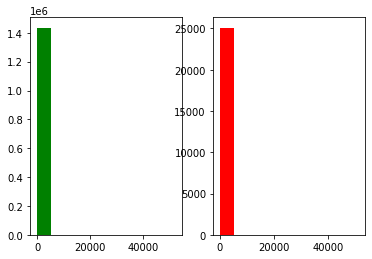

In [277]:
fig,ax = plt.subplots(1,2)

ax[0].hist(df.groupby('order_id')['new_price'].sum(), color='green')
ax[1].hist(df.groupby('product_id')['new_price'].mean(), color='red')
plt.show()

#### 2. Постройте график зависимости суммы покупок от дней.

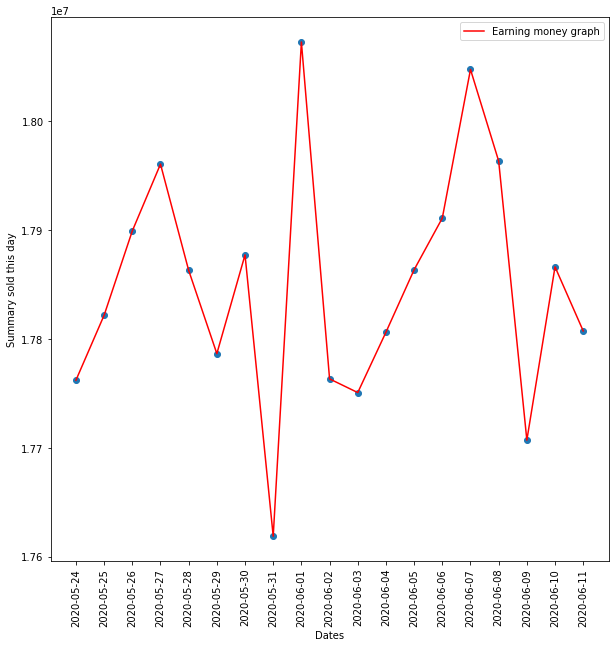

In [278]:
plt.figure(figsize=(10, 10))
series = df.groupby(['date', 'order_id'])['new_price'].sum().groupby('date').sum()
x = series.index
y = series.values
plt.scatter(x, y)
plt.plot(x, y, label='Earning money graph', color='red')
plt.xticks(x, rotation='vertical')
plt.xlabel('Dates')
plt.ylabel('Summary sold this day')
plt.legend()

#### 3. Постройте средних сумм покупок по дням недели (bar plot).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


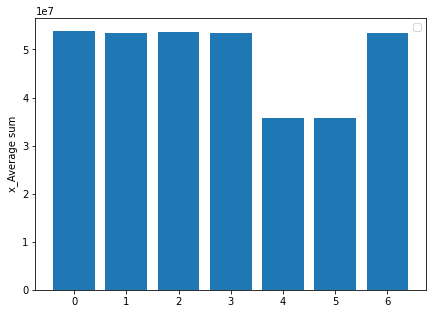

In [279]:
plt.figure(figsize=(7, 5))

df['date'] = pd.to_datetime(df['date'])
df['y_weekday'] = df['date'].dt.weekday
bar_dataframe = df.groupby('y_weekday')['new_price'].sum()
x = bar_dataframe.index
y = bar_dataframe.values
plt.bar(x, y)
plt.ylabel('x_Average sum')
plt.legend()

#### 4. Постройте график зависимости денег за товар от купленного количества (scatter plot).

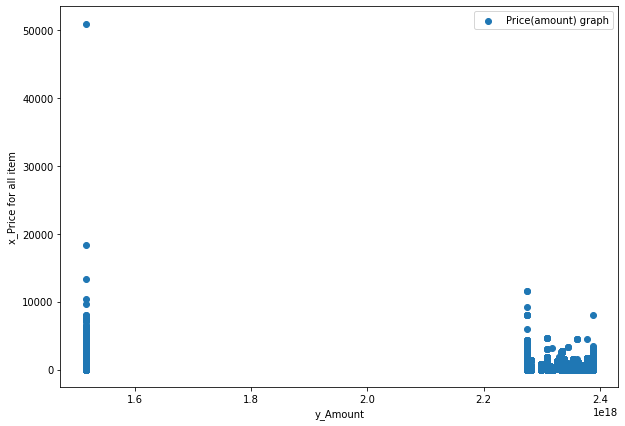

In [280]:
plt.figure(figsize=(10, 7))
df['numcounts'] = df['product_id'].values
x = df['numcounts']
y = df['new_price'].values
plt.scatter(x, y, label='Price(amount) graph')
plt.xlabel('y_Amount')
plt.ylabel('x_Price for all item')
plt.legend()

Сохраните график в формате pdf (так он останется векторизованным).

In [281]:
plt.savefig('Figure.pdf')

<Figure size 432x288 with 0 Axes>

Кстати, существует надстройка над matplotlib под названием [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Иногда удобнее и красивее делать визуализации через неё. 